# K_Means
---

In [33]:
from IPython.display import Image

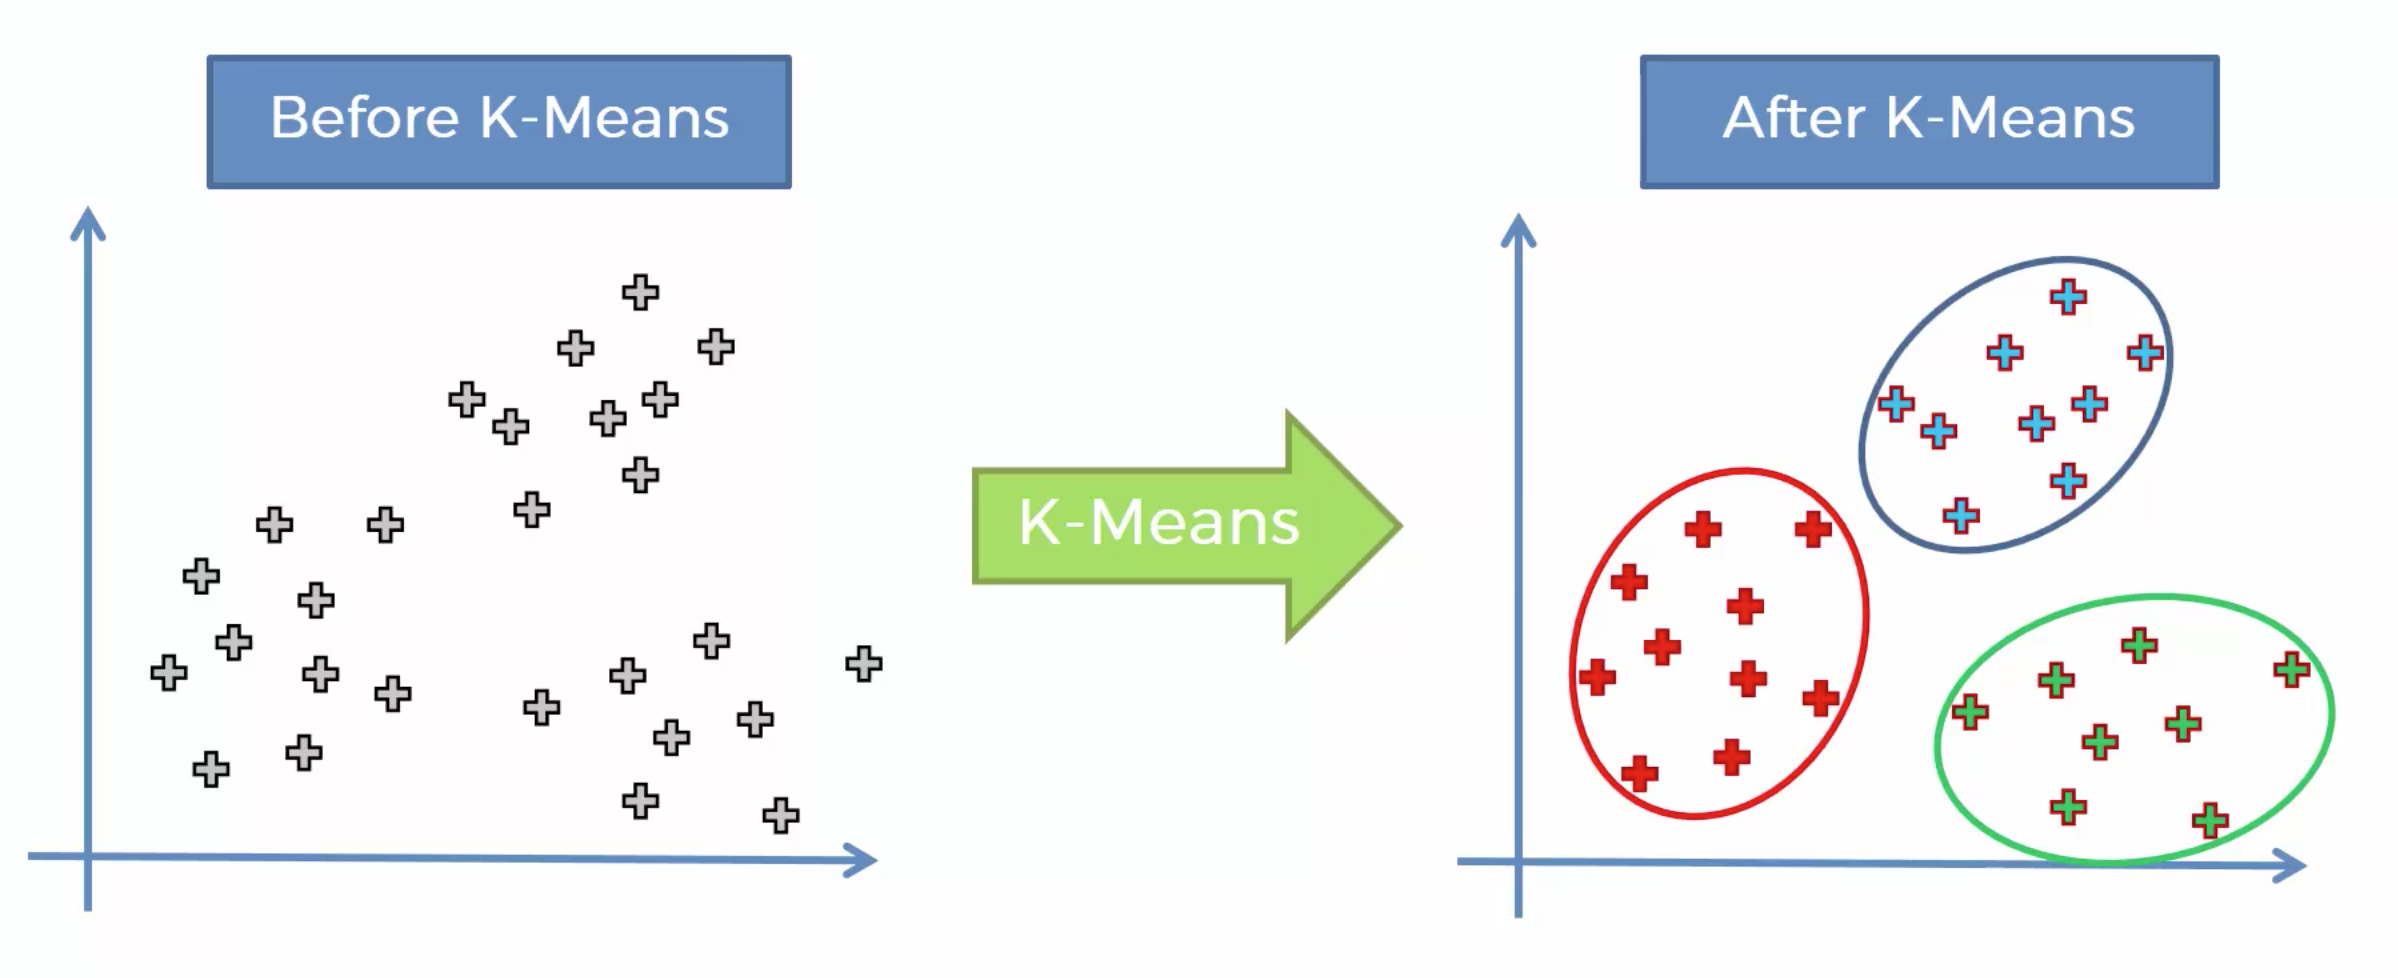

In [37]:
Image('img/After K-Means.png', width=500, height=350)

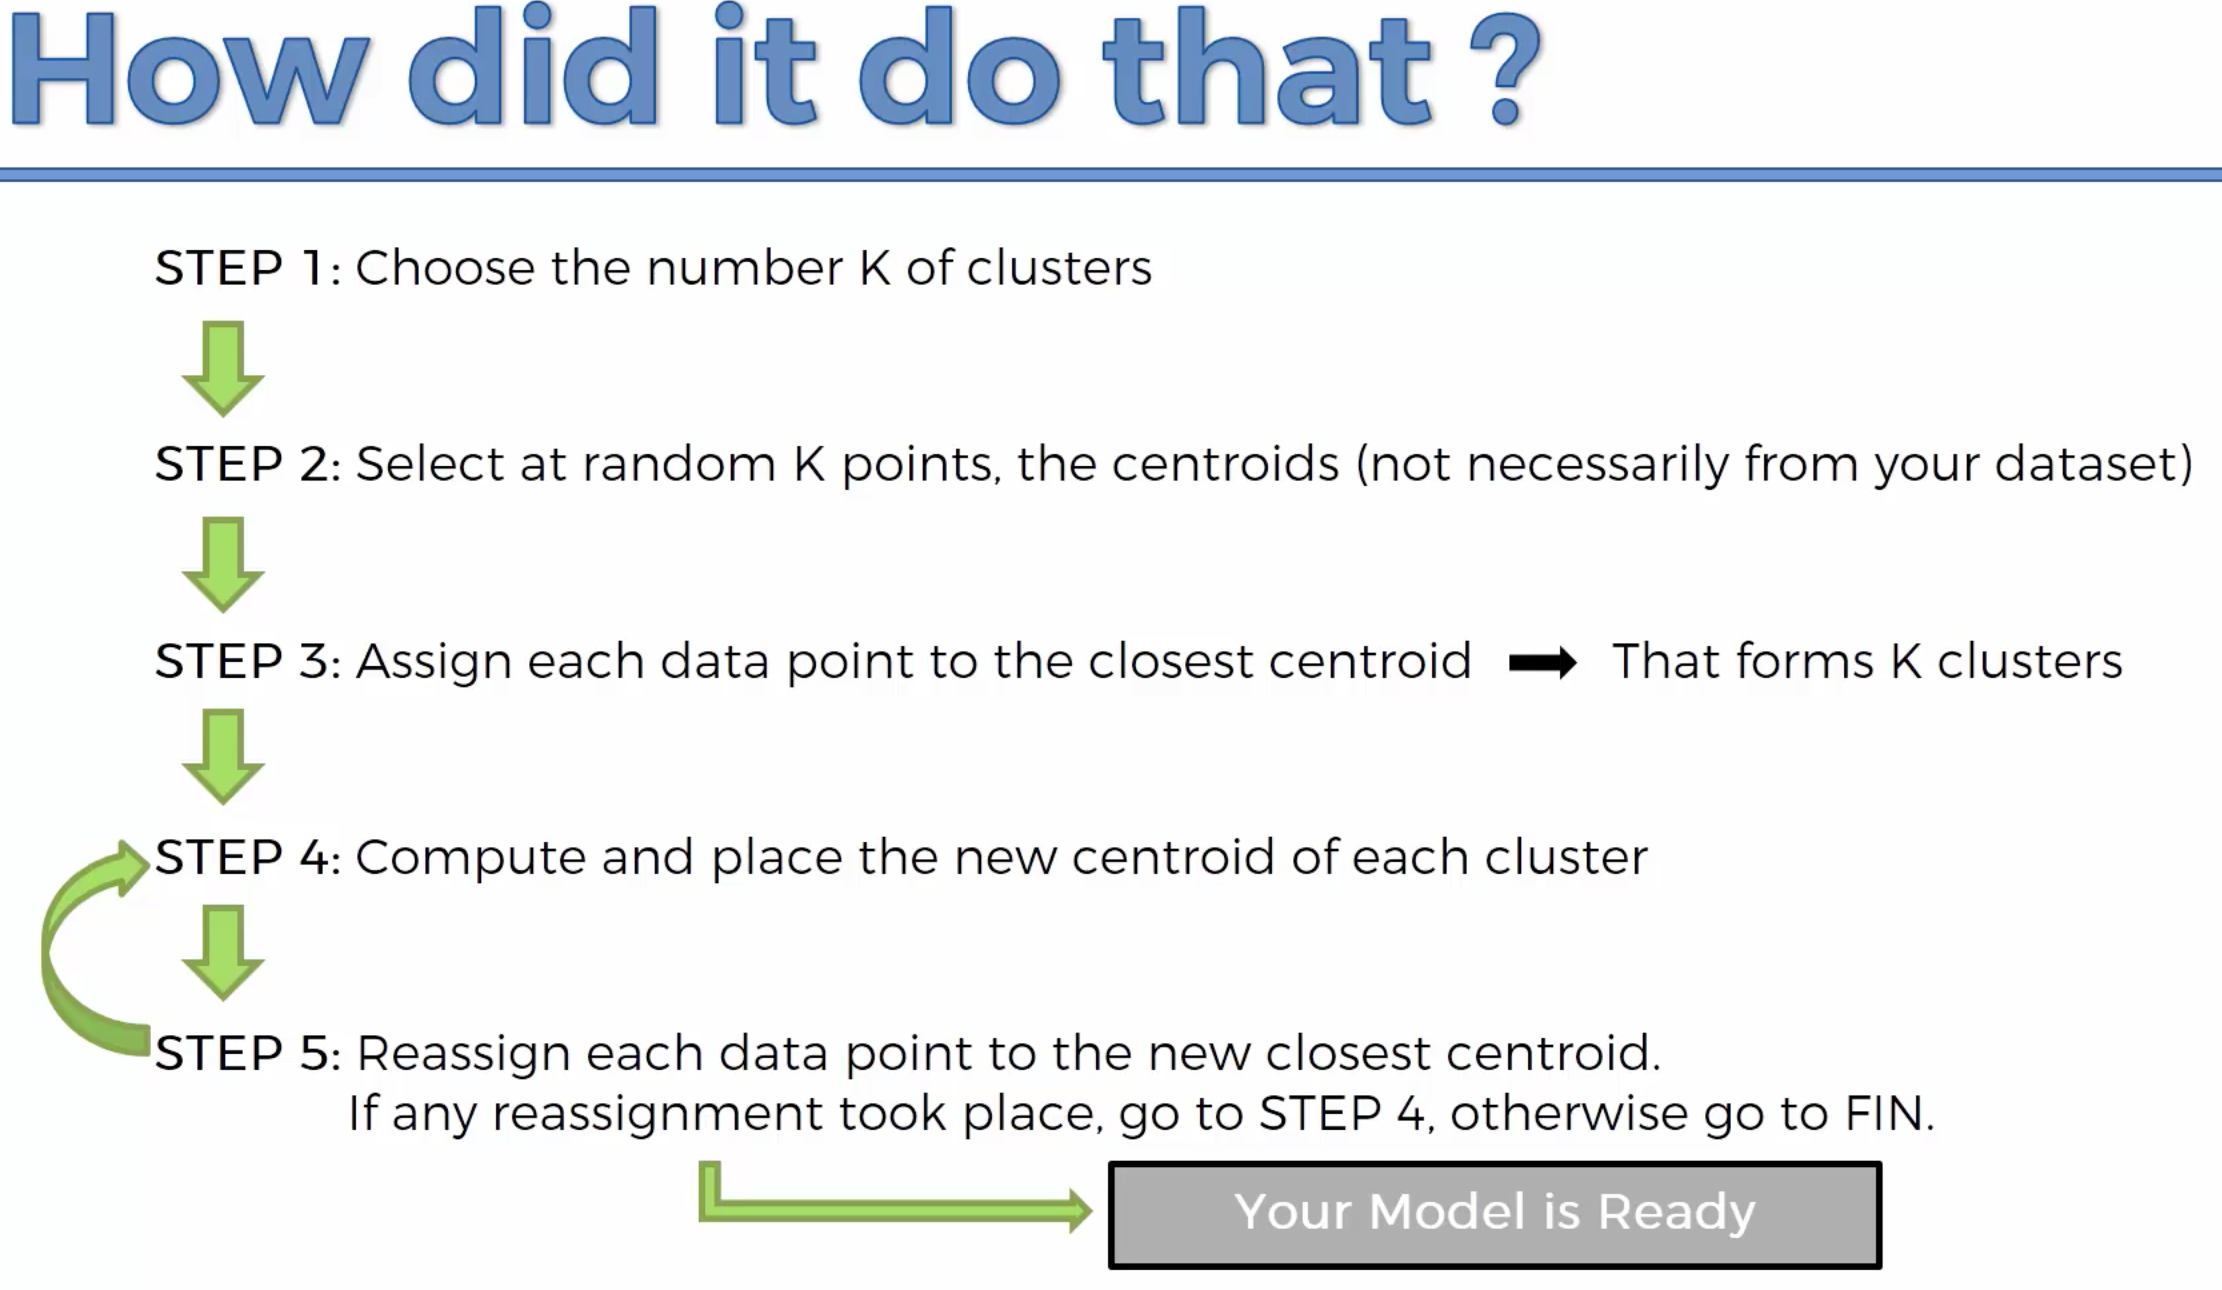

In [38]:
Image('img/Map Road.png', width=500, height=350)

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.cluster import KMeans

**Import dataset:**

In [4]:
dataset = pd.read_csv('Data/Mall_Customers.csv')
dataset.head(10)

CustomerID   Genre  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40
5           6  Female   22                  17                      76
6           7  Female   35                  18                       6
7           8  Female   23                  18                      94
8           9    Male   64                  19                       3
9          10  Female   30                  19                      72

In [8]:
X = dataset.iloc[:, [3, 4]].values

array([[15, 39],
       [15, 81],
       [16,  6],
       [16, 77],
       [17, 40]])

**Using the elbow method to find the optimal number of clusters:**

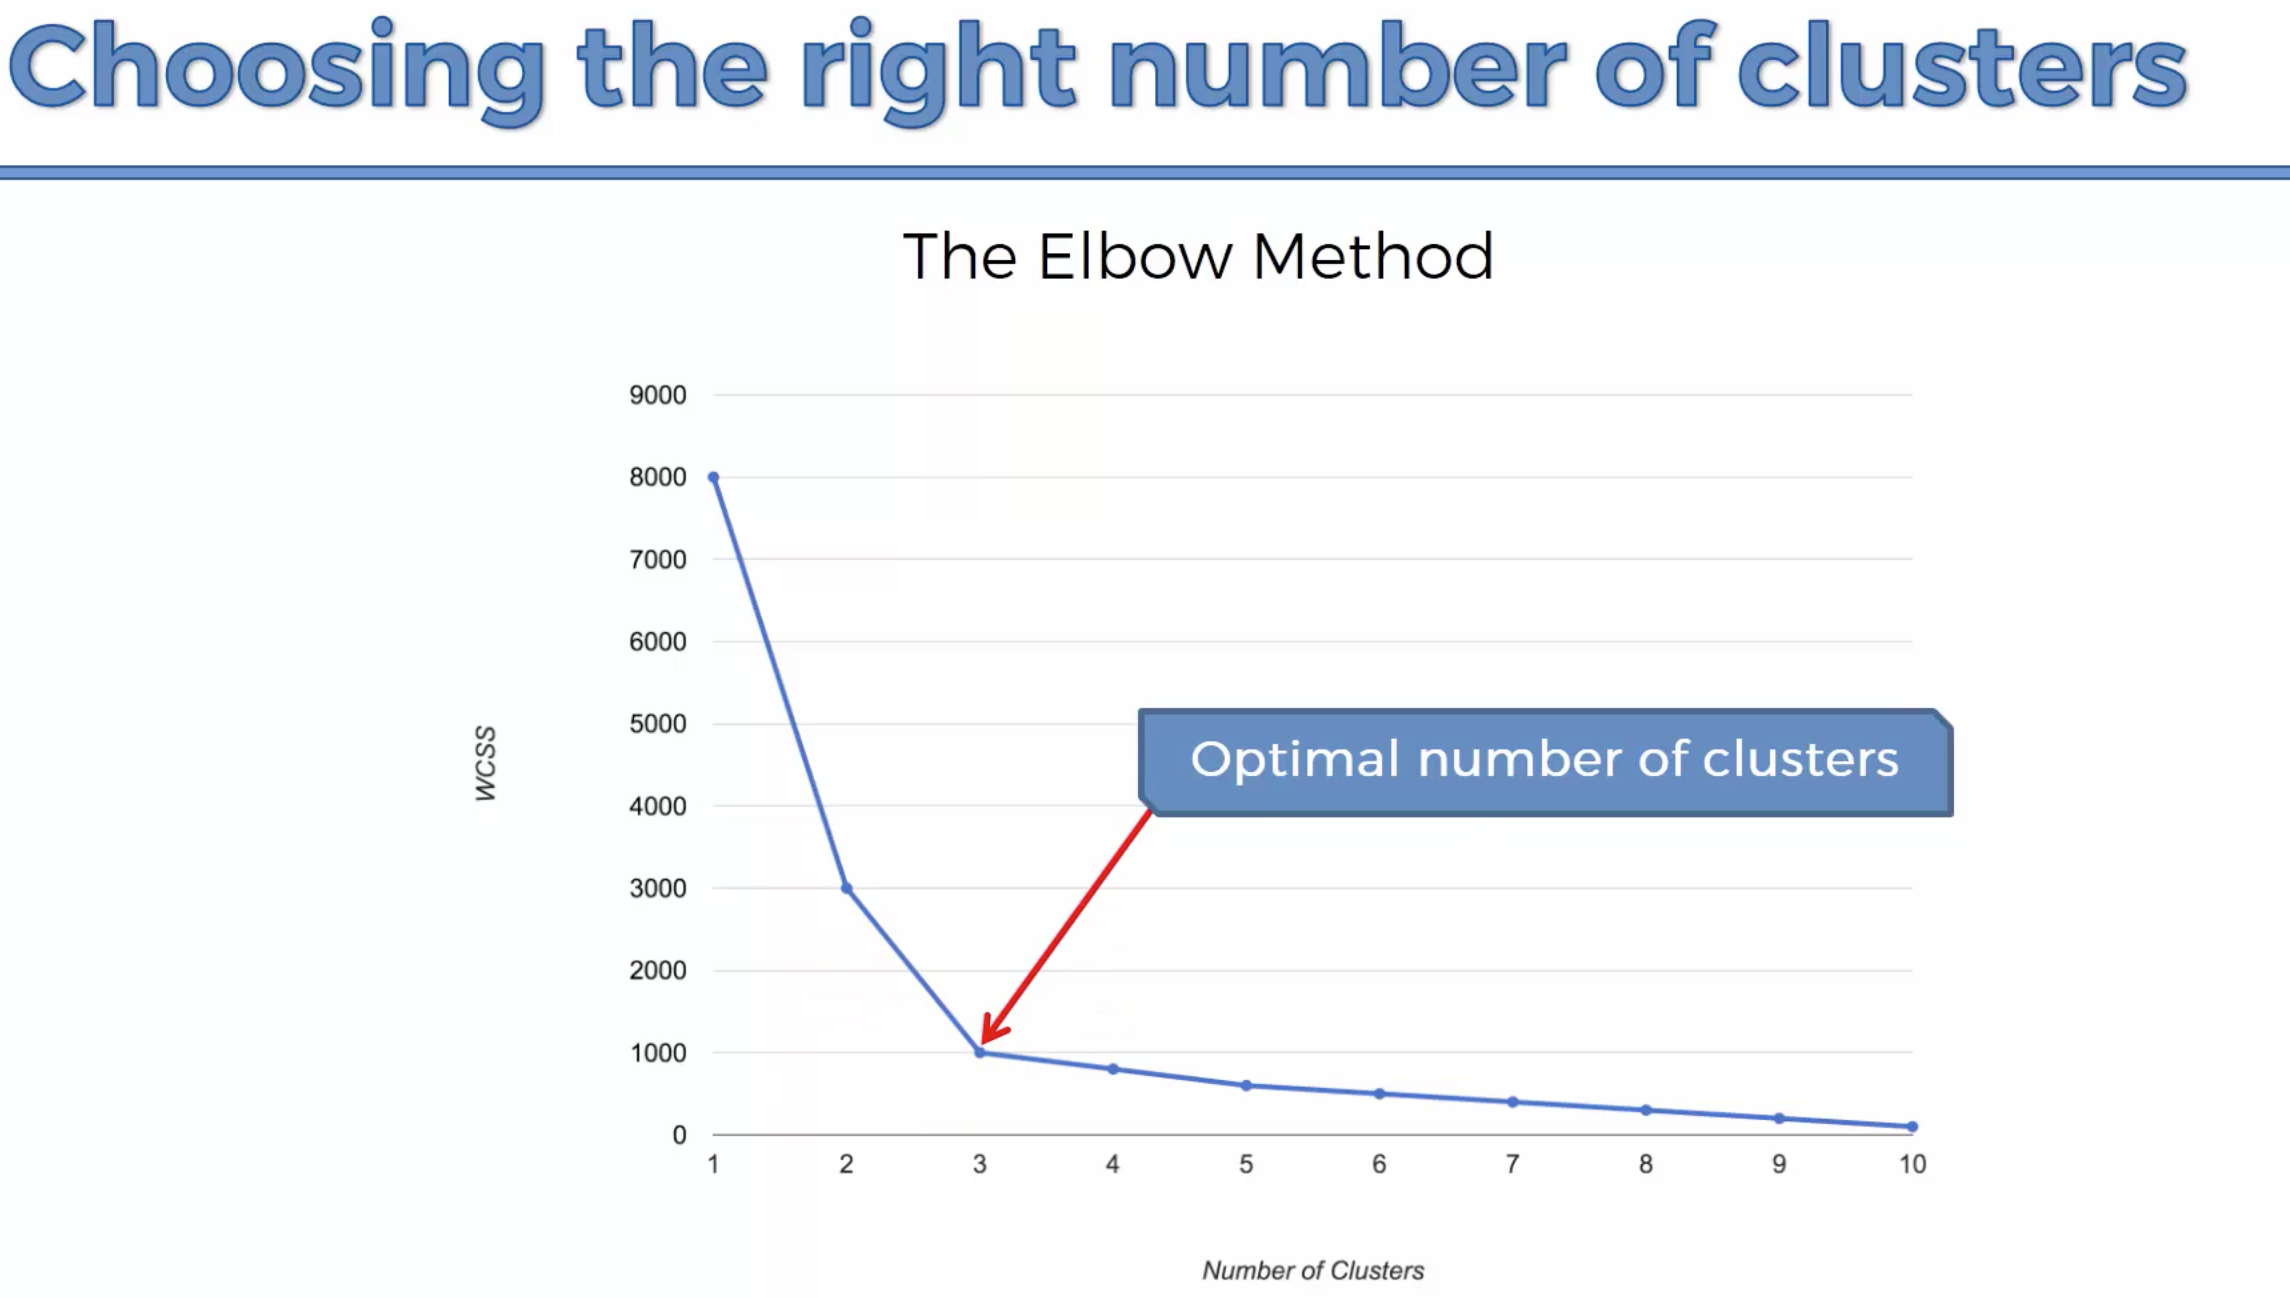

In [39]:
Image('img/The Elbow Method.png', width=500, height=350)

**'k-means++' : ** selects initial cluster centers for k-mean
    clustering in a smart way to speed up convergence. See section
    Notes in k_init for more details. 

**n_init :** int, default: 10
    Number of time the k-means algorithm will be run with different
    centroid seeds. The final results will be the best output of
    n_init consecutive runs in terms of inertia.

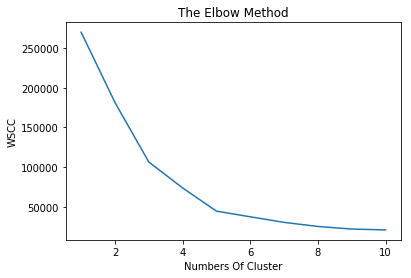

In [12]:
wscc = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i,
                    init = 'k-means++',
                    max_iter = 300,
                    n_init = 10,
                    random_state = 0)
    kmeans.fit(X)
    wscc.append(kmeans.inertia_)
plt.plot(range(1, 11), wscc)
plt.title('The Elbow Method')
plt.xlabel('Numbers Of Cluster')
plt.ylabel('WSCC')
plt.show()

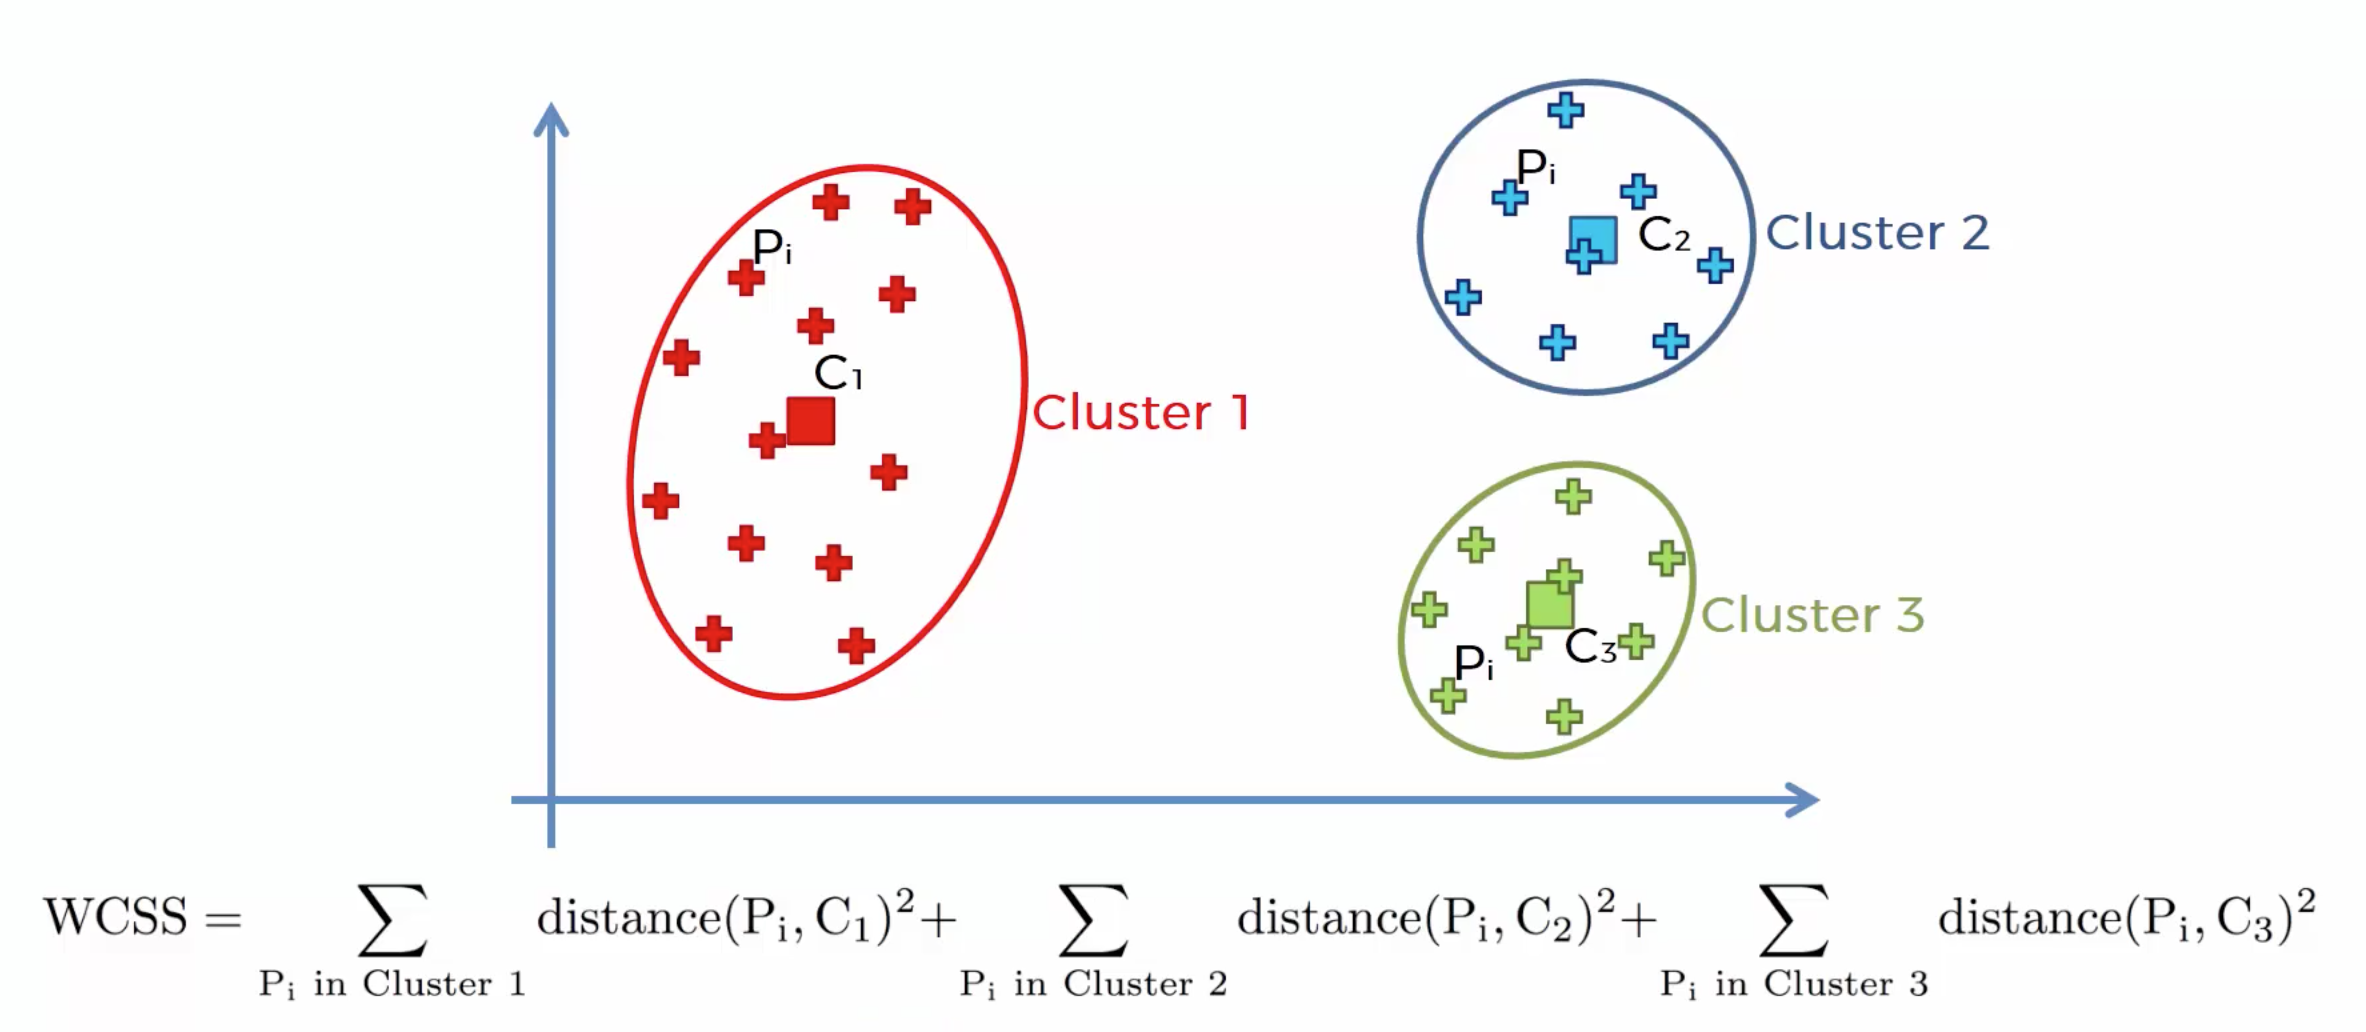

In [43]:
Image('img/WCSS.png', width=600, height=600)

**Appling k-means algoritms to dataset:**

In [24]:
kmeans = KMeans(n_clusters = 5,
                    init = 'k-means++',
                    max_iter = 300,
                    n_init = 10,
                    random_state = 0)
y_means = kmeans.fit_predict(X)
print("First person cluster to", y_means[0], 'group')
print("Second person cluster to", y_means[1], 'group')
print("Third person cluster to", y_means[2], 'group')

First person cluster to 4 group
Second person cluster to 3 group
Third person cluster to 4 group


**Visualising The Clusters:**

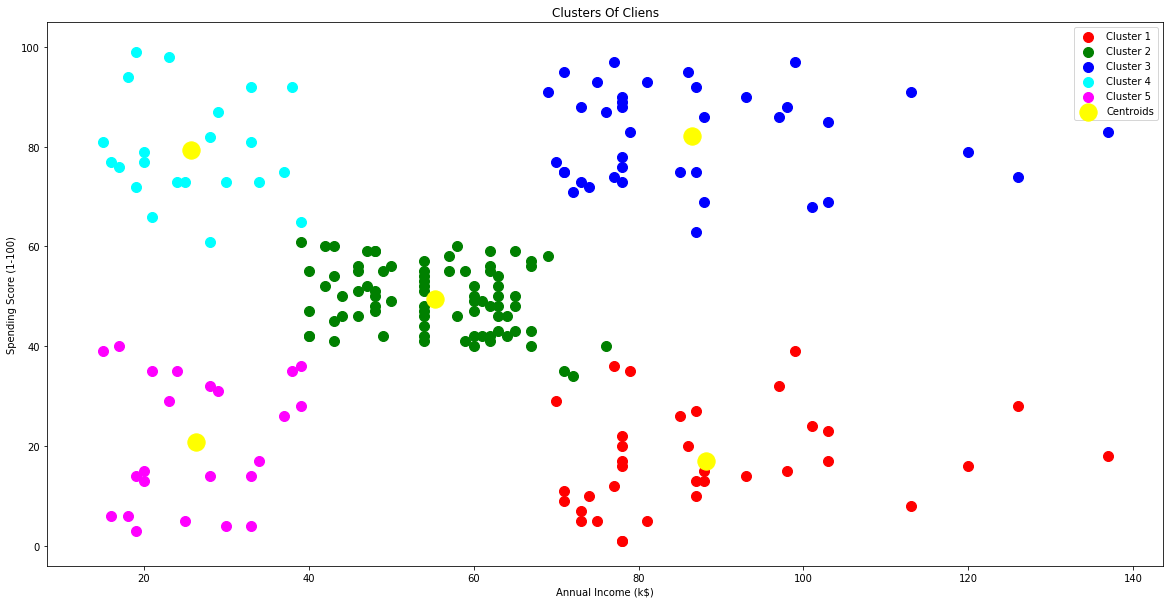

In [32]:
plt.figure(figsize=(20,10)) 
plt.scatter(X[y_means == 0, 0], X[y_means == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_means == 1, 0], X[y_means == 1, 1], s = 100, c = 'green', label = 'Cluster 2')
plt.scatter(X[y_means == 2, 0], X[y_means == 2, 1], s = 100, c = 'blue', label = 'Cluster 3')
plt.scatter(X[y_means == 3, 0], X[y_means == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
plt.scatter(X[y_means == 4, 0], X[y_means == 4, 1], s = 100, c = 'magenta', label = 'Cluster 5')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Clusters Of Cliens')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend();